# Tutoriel 7 - Introduction SIG & Projection (B)

# Visualisation Cartopy

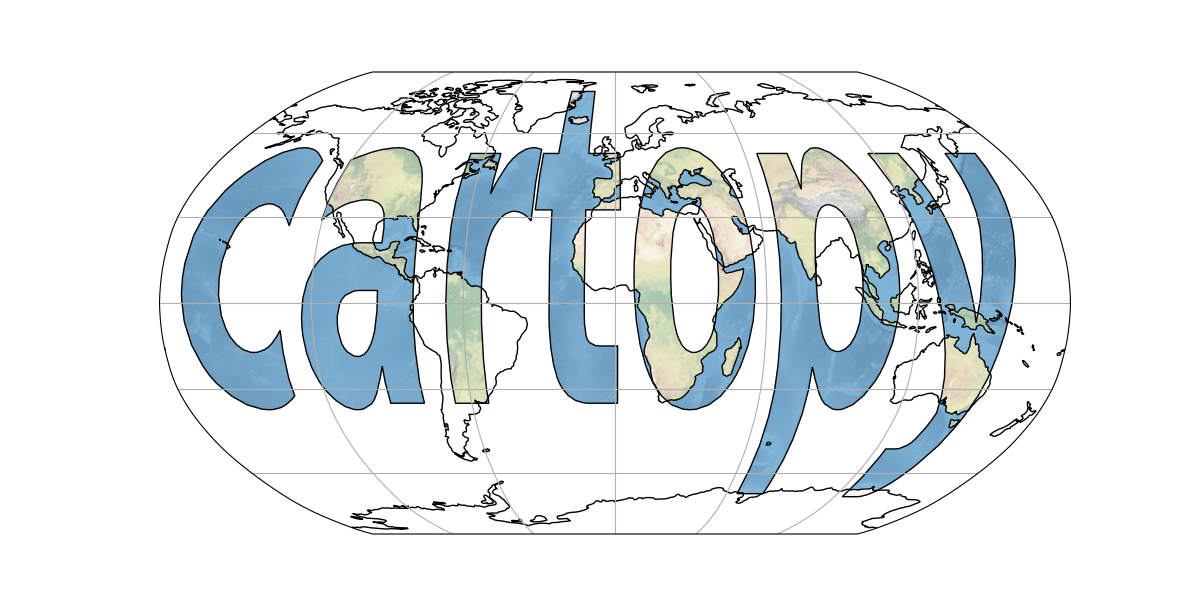

La réalisation de cartes est un élément fondamental de la recherche en géosciences. Les cartes se distinguent des figures ordinaires par les principales caractéristiques suivantes :
* Les cartes nécessitent une *projection* des coordonnées géographiques de la Terre en 3D dans l'espace 2D de votre figure.
* Les cartes comprennent souvent des décorations supplémentaires en plus de nos données (par exemple, les continents, les frontières des pays, etc.)


La cartographie est un problème notoirement difficile et compliqué, principalement en raison de la complexité de la projection.
Dans ce cours, nous découvrirons [Cartopy](https://scitools.org.uk/cartopy/docs/latest/), l'un des paquets les plus courants pour créer des cartes en Python. Une autre bibliothèque populaire et puissante est [Basemap](https://matplotlib.org/basemap/); cependant, Basemap [disparaît](https://matplotlib.org/basemap/users/intro.html#cartopy-new-management-and-eol-announcement) et sera remplacé par Cartopy dans un avenir proche. C'est pourquoi il est recommandé aux nouveaux apprenants de python d'apprendre Cartopy.

Une grande partie du contenu de cette leçon a été reprise de l'excellent [Tutoriel Cartopy] de [Phil Elson](https://pelson.github.io/)(https://github.com/SciTools/cartopy-tutorial).Phil est le créateur de Cartopy et a publié son tutoriel sous [licence ouverte](http://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/).

## Contexte :Projections
La plupart de nos supports de visualisation *sont* plats. Nos deux supports les plus courants sont plats :
* le papier
* l'écran

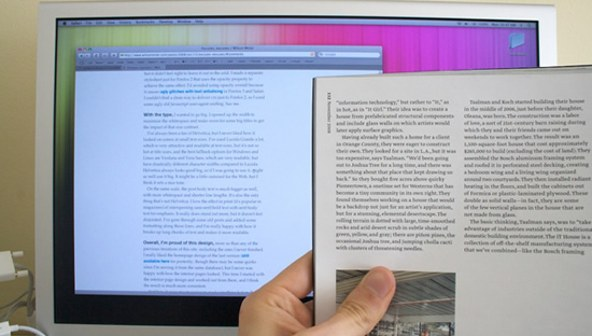

## Introduction
[Cartopy](https://scitools.org.uk/cartopy/docs/latest/) utilise les puissantes bibliothèques [PROJ](https://proj.org/), [numpy](https://numpy.org/doc/) et [shapely](https://shapely.readthedocs.io/en/stable/manual.html) et inclut une interface programmatique construite au-dessus de [matplotlib](https://matplotlib.org/stable/) pour la création de cartes de qualité.
Les principales caractéristiques de cartopy sont ses définitions de projections orientées objet et sa capacité à transformer des points, des lignes, des vecteurs, des polygones et des images entre ces projections.

### Projections de Cartopie et autres systèmes de référence
Dans Cartopy, chaque projection est une classe. La plupart des classes de projection peuvent être configurées de manière spécifique à la projection, bien que Cartopy adopte une position d'opinion sur les valeurs par défaut raisonnables.
Créons une instance de projection `Plate Carree`.
Pour ce faire, nous avons besoin du module `crs` de Cartopy. Celui-ci est typiquement importé sous le nom de `ccrs` (Cartopy Coordinate Reference Systems).
Tout d'abord, installons `cartopy` pour l'utiliser dans ce carnet Google Colab. 💻 Nous devons [d'abord installer `shapely` sans binaire](https://github.com/SciTools/cartopy/issues/1490), ce qui devrait empêcher votre carnet Google Colab de planter.

In [1]:
!pip install --no-binary 'shapely==1.6.4' 'shapely==1.6.4' --force
!pip install cartopy # Installer la dernière version de cartopy

ERROR: Could not find a version that satisfies the requirement shapely==1.6.4 (from versions: none)
ERROR: No matching distribution found for shapely==1.6.4


In [2]:
import cartopy.crs as ccrs
import cartopy

La liste des projections de Cartopy nous indique que la [projection] `Plate Carree`(https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html) est disponible avec la classe `ccrs.PlateCarree` :
**Note**: nous devons instancier la classe pour pouvoir faire quoi que ce soit avec les projections !

In [3]:
ccrs.PlateCarree()

<Projected CRS: +proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=0.0 +to ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (unknown)
- N[north]: Northing (unknown)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Equidistant Cylindrical
Datum: Unknown based on WGS 84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Dessiner une carte
Cartopy dépend optionnellement de matplotlib, et chaque projection sait comment créer un Axes matplotlib (ou AxesSubplot) qui peut se représenter.
L'axe créé par la projection est un [cartopy.mpl.geoaxes.GeoAxes](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html). Cette sous-classe Axes surcharge certaines méthodes existantes de matplotlib, et ajoute un certain nombre de méthodes extrêmement utiles pour dessiner des cartes.
Nous reviendrons sur ces méthodes dans quelques instants, mais d'abord, voyons la danse cartopy+matplotlib en action :

<GeoAxes: >

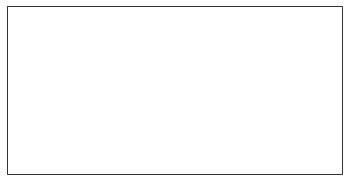

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.axes(projection=ccrs.PlateCarree())

C'était un peu décevant, mais nous pouvons voir que l'Axes créé est en effet une de ces instances GeoAxes[Subplot].
L'une des méthodes les plus utiles que cette classe ajoute à la classe Axes standard de matplotlib est la méthode `coastlines`. Sans arguments, elle ajoutera à la carte les données du trait de côte à l'échelle 1:110 000 000 de Natural Earth.

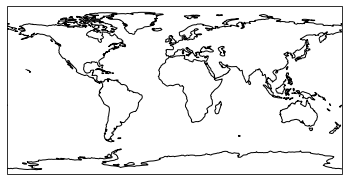

In [5]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

Nous aurions également pu créer un sous-graphe `matplotlib` avec l'une des nombreuses approches existantes. Par exemple, la fonction `plt.subplots` pourrait être utilisée :

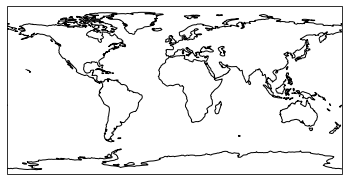

In [6]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()

Les classes de projection ont des options que nous pouvons utiliser pour personnaliser la carte

In [7]:
ccrs.PlateCarree?

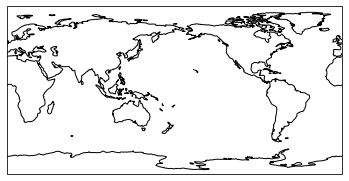

In [8]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.coastlines()

### Méthodes utiles d'un GeoAxes

La classe [cartopy.mpl.geoaxes.GeoAxes](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html) ajoute un certain nombre de méthodes utiles.
Jetons-y un coup d'œil :
* [set_global](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html?highlight=set_global#cartopy.mpl.geoaxes.GeoAxes.set_global)- permet de dézoomer la carte autant que possible
* [set_extent](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html?highlight=set_global#cartopy.mpl.geoaxes.GeoAxes.set_extent)- agrandit la carte jusqu'à la boîte de délimitation donnée
* [gridlines](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html?highlight=set_global#cartopy.mpl.geoaxes.GeoAxes.gridlines)- ajoute des lignes de quadrillage (et éventuellement des étiquettes) aux axes
* [coastlines](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html?highlight=set_global#cartopy.mpl.geoaxes.GeoAxes.coastlines)- ajoute les lignes de côte de Natural Earth aux axes
* [stock_img](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html?highlight=set_global#cartopy.mpl.geoaxes.GeoAxes.stock_img) - ajoute une image d'arrière-plan de la Terre Naturelle en basse résolution aux axes
* [imshow](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html?highlight=set_global#cartopy.mpl.geoaxes.GeoAxes.imshow)- ajoute une image (tableau numpy) aux axes
* [add_geometries](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html?highlight=set_global#cartopy.mpl.geoaxes.GeoAxes.add_geometries)- ajoute une collection de géométries (Shapely) aux axes

### Quelques autres exemples de différentes projections globales

ImportError: Using image transforms requires either pykdtree or scipy.

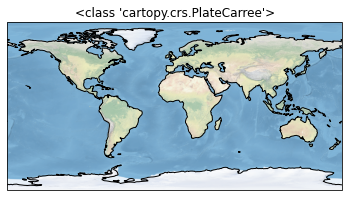

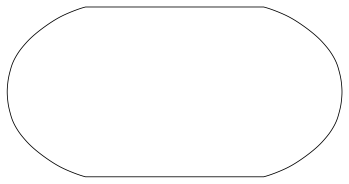

In [9]:
projections = [ccrs.PlateCarree(),
               ccrs.Robinson(),
               ccrs.Mercator(),
               ccrs.Orthographic(),
               ccrs.InterruptedGoodeHomolosine()
              ]


for proj in projections:
    plt.figure()
    ax = plt.axes(projection=proj)
    ax.stock_img()
    ax.coastlines()
    ax.set_title(f'{type(proj)}')

### Cartes régionales
Pour créer une carte régionale, nous utilisons la méthode `set_extent` de GeoAxis pour limiter la taille de la région.

In [ ]:
central_lon, central_lat = -10, 45
extent = [-40, 20, 30, 60]
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.gridlines()
ax.coastlines(resolution='50m')

## Ajouter des éléments à la carte
Pour donner plus de style et de détails à notre carte, nous ajoutons des objets `cartopy.feature`. De nombreuses caractéristiques utiles sont intégrées. Ces "caractéristiques par défaut" ont une résolution grossière (110m).

| **Nom**      | **Description** |
| ------------------------- | --------------- |
| `cartopy.feature.BORDERS` | Frontières de pays |
| `cartopy.feature.COASTLINE` | Tracé de la côte, y compris les principales îles |
| `cartopy.feature.LAKES` | Lacs naturels et artificiels | `cartopy.feature.LAKES` | Lacs naturels et artificiels
`cartopy.feature.LAND` | polygones terrestres, y compris les îles principales | `cartopy.feature.LAND` | polygones terrestres, y compris les îles principales |
| `cartopy.feature.OCEAN` | Polygones d'océan
`cartopy.feature.RIVERS` | polygones des océans | `cartopy.feature.RIVERS` | polygones de drainage, y compris les lignes médianes des lacs

Nous illustrons ci-dessous ces caractéristiques sur une carte personnalisée de l'Amérique du Nord.

In [ ]:
import cartopy.feature as cfeature
import numpy as np

central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.gridlines()

Si nous voulons des caractéristiques à plus haute résolution, Cartopy peut les télécharger et les créer automatiquement à partir de la base de données [Natural Earth Data database](http://www.naturalearthdata.com/) ou de la base de données [GSHHS dataset](https://www.ngdc.noaa.gov/mgg/shorelines/gshhs.html).

In [ ]:
rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m')

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')
ax.gridlines()

## Ajout de données à la carte

Maintenant que nous savons comment créer une carte, ajoutons-y nos données ! Exactement.

Parce que notre carte est un axe matplotlib, nous pouvons utiliser toutes les commandes maptplotlib familières pour créer des tracés. Par défaut, l'étendue de la carte sera ajustée pour correspondre aux données. Nous pouvons remplacer cela avec les commandes `.set_global` ou `.set_extent`.

In [ ]:
# créer des données de test
new_york = dict(lon=-74.0060, lat=40.7128)
honolulu = dict(lon=-157.8583, lat=21.3069)
lons = [new_york['lon'], honolulu['lon']]
lats = [new_york['lat'], honolulu['lat']]

**Point clé** : les données doivent également être transformées dans l'espace de projection.

Cela se fait via le mot-clé `transform=` dans la méthode de traçage. L'argument est un autre objet `cartopy.crs`. Si vous ne spécifiez pas de transformation, Cartopy suppose que les données utilisent la même projection que le GeoAxis sous-jacent.

Extrait de la [Documentation Cartopy](https://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html) :

"Le concept de base est que la projection de vos axes est indépendante du système de coordonnées dans lequel vos données sont définies. L'argument `projection` est utilisé lors de la création de tracés et détermine la projection du tracé résultant (c'est-à-dire à quoi ressemble le tracé). L'argument `transform` des fonctions de traçage indique à Cartopy dans quel système de coordonnées vos données sont définies."

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.plot(lons, lats, label='Equirectangular straight line')
ax.plot(lons, lats, label='Great Circle', transform=ccrs.Geodetic())
ax.coastlines()
ax.legend()
ax.set_global()

### Traçage de données 2D (Raster)
Les mêmes principes s'appliquent aux données 2D. Ci-dessous, nous créons quelques exemples de données définies en coordonnées lat/lon régulières.

In [ ]:
import numpy as np
lon = np.linspace(-80, 80, 25)
lat = np.linspace(30, 70, 25)
lon2d, lat2d = np.meshgrid(lon, lat)
data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)
plt.contourf(lon2d, lat2d, data)

Maintenant, nous créons une projection `PlateCarree` et y traçons les données sans aucun mot-clé `transform`. Cela fonctionne car `PlateCarree` est la projection la plus simple de données de latitude/longitude.

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data)

Cependant, si nous essayons la même chose avec une projection différente, nous obtenons un résultat erroné.

In [ ]:
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data)

Pour résoudre ce problème, nous devons passer l'argument de transformation correct à `contourf` :

In [ ]:
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data, transform=ccrs.PlateCarree())

### Affichage des images

Nous pouvons facilement tracer une image satellite sur une carte si nous connaissons son étendue

In [ ]:
! wget https://lance-modis.eosdis.nasa.gov/imagery/gallery/2012270-0926/Miriam.A2012270.2050.2km.jpg

In [ ]:
fig = plt.figure(figsize=(8, 12))

# ceci vient de la documentation de la cartopie
fname = 'Miriam.A2012270.2050.2km.jpg'
img_extent = (-120.67660000000001, -106.32104523100001, 13.2301484511245, 30.766899999999502)
img = plt.imread(fname)

ax = plt.axes(projection=ccrs.PlateCarree())

# définir une marge autour des données
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

# ajoute l'image. Parce que cette image était un tif, « l'origine » de l'image est dans le
# coin supérieur gauche
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=1)

# marquer un lieu connu pour nous aider à nous géolocaliser§
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())

## Bonus : Intégration Xarray
Les transformations Cartopy peuvent être transmises à « xarray » ! Cela crée un chemin très rapide pour créer des cartes d’aspect professionnel à partir de données netCDF.

In [ ]:
import pooch
import urllib.request
datafile = pooch.retrieve('https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EdY_7ttKxltLp-u6r1MpDggBvqGb355_VecnfPRLEIsMog?download=1',
                          known_hash='af8ff05bfeb8da2ec763773bfcc06112f20cb7167613359c98a2b80313c45b73')

In [ ]:
import xarray as xr
ds = xr.open_dataset(datafile, drop_variables=['time_bnds'])
ds

In [ ]:
sst = ds.sst.sel(time='2000-01-01', method='nearest')
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()
sst.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=2, vmax=30, cbar_kwargs={'shrink': 0.4})

## Faire plus
Parcourez la [Galerie Cartopy](https://scitools.org.uk/cartopy/docs/latest/gallery/index.html) pour en savoir plus sur tous les différents types de données et méthodes de traçage disponibles !